# 多項式迴歸(Polynomial Regression)

##### 先引入我們的packages

In [1]:
import os 
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

# 資料前處理

In [2]:
# 設定我們讀資料的路徑
# 然後電腦就會根據路徑底下
# 按照檔名依序讀檔
PATH="C:\\Users\\user\\Documents\\股票資料"
os.chdir(PATH)                                               
file_list = os.listdir()
# 這邊可以看到我們先打開第一個csv檔
# 模式選取"r"讀的意思
df = open(PATH+"\\"+file_list[0], "r")
# 我們先把檔案打開來第一行檔案說明
# 用readline讀過
title=df.readline()
# 接著再把我們真正需要的數據存到data裡
data = pd.read_csv(df)
# 接著把不重要的資訊"日期"和多餘的一行"Unnamed: 9"刪除
data=data.drop(['日期','Unnamed: 9'],axis=1)
# 然後我們再把資料有缺陷沒有數據的欄位刪除
data=data.dropna()
All_data=data
# 因為總共36個月的資料
for i in range(1,36):
    #這裡讀檔方式和上面一樣
    df = open(PATH+"\\"+file_list[i], "r")
    title=df.readline()
    data = pd.read_csv(df)
    data=data.drop(['日期','Unnamed: 9'],axis=1)
    data=data.dropna()
    # 然後每讀一次資料，我們就把新的資料
    # 接在舊的資料後面
    All_data=pd.concat([All_data,data])
All_data

,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,"18,055,269","4,188,555,408",231.5,232.5,231.0,232.5,3,"9,954"
1,"31,706,091","7,504,382,512",236.0,238.0,235.5,237.0,4.5,"13,633"
2,"29,179,613","6,963,192,636",240.0,240.0,236.5,239.5,2.5,"10,953"
3,"23,721,255","5,681,934,695",240.0,240.0,238.0,240.0,0.5,"8,659"
4,"21,846,692","5,281,823,362",242.0,242.5,240.5,242.0,2,"10,251"
...,...,...,...,...,...,...,...,...
18,"12,581,145","6,449,612,552",514.0,515.0,510.0,511.0,+1.00,"14,988"
19,"19,520,886","10,023,145,125",512.0,515.0,509.0,515.0,+4.00,"16,675"
20,"20,226,736","10,409,159,045",515.0,517.0,513.0,515.0,0.00,"17,187"
21,"46,705,107","24,306,881,615",516.0,525.0,514.0,525.0,+10.00,"33,173"


# 資料視覺化

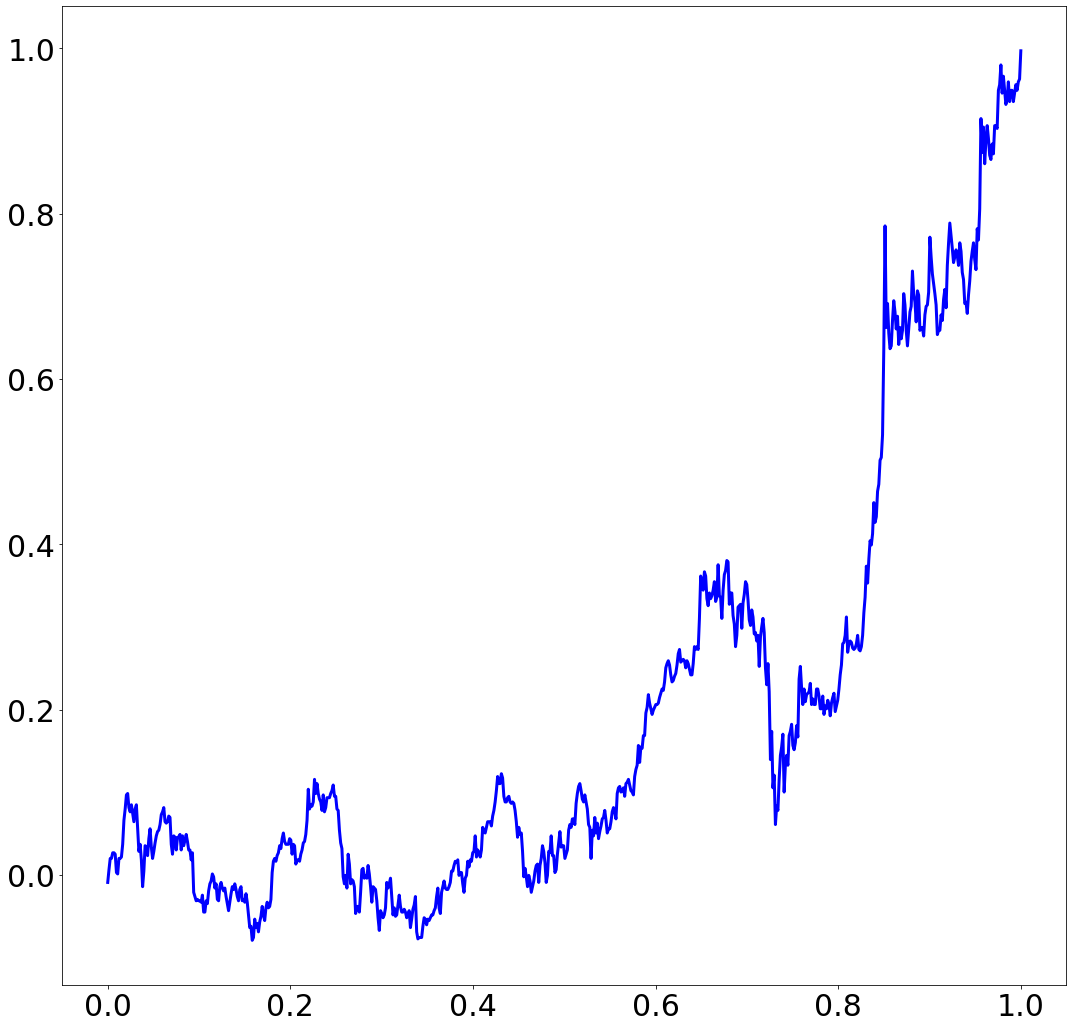

In [3]:
# 這裡我們將我們的資料normalize
# x軸為0~1間取734筆資料
# y軸相對應那天股票的開盤價
x=np.linspace(0,1,len(All_data))
y=np.array(All_data.iloc[:,2]/np.mean(All_data.iloc[:,2])-0.8)
# 繪圖
plt.rcParams["figure.figsize"] = (18,18)
plt.plot(x,y,"b-",linewidth=3)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

# 預測

In [4]:
df = open(PATH+"\\"+file_list[-1], "r")
title=df.readline()
data = pd.read_csv(df)
data=data.drop(['日期','Unnamed: 9'],axis=1)
data=data.dropna()
test_x=np.linspace(len(x)+1,len(x)+len(data),len(data))*(x[1]-x[0])
test_y=np.array(data.iloc[:,2]/np.mean(All_data.iloc[:,2])-0.8)

# 演算法

In [5]:
# 這裡就是我們更新權重的方程式
def refresh(X,y,w,a):
    # 這裡可以比照公式
    dJ=(X.dot(w.T)-y).dot(X)/len(y)
    new_w=w-a*dJ
    return new_w
def Polynomial_regression(s,x,y,test_x,test_y):
    # n：n次方特徵轉換
    # a：學習速度參數
    # X：資料矩陣
    # w：權重
    # T：更新次數
    n=s+1
    a=1
    X=np.zeros((len(x),n))
    # 產生我們的資料矩陣
    for i in range(0,n):
        X[:,i]=x**i
    # 初始化我們的權重
    w=(np.linalg.inv((X.T).dot(X)).dot(X.T)).dot(y)
    T=10000
    # 先記錄我們初始值w產生的估計值
    plot_yy=X.dot(w.T)
    # 開始執行演算法用梯度下降更新權重
    for t in range(0,T):
        w=refresh(X,y,w,a)
        # 一樣記錄我們最後w產生的估計值
    plot_y=X.dot(w.T)
    # 計算真實值和估計值相差的總和
    error=0
    for k in range(0,len(y)):
        error+=abs(plot_y[k]-y[k])
    error=error/len(y)
    print("Trainging error = ", error)
    # 產生我們測試集的資料矩陣
    test_X=np.zeros((len(test_x),n))
    for i in range(0,n):
        test_X[:,i]=test_x**i
    pred_error=0
    pred_y=test_X.dot(w.T)
    # 計算測試集的錯誤率
    for k in range(0,len(pred_y)):
        pred_error+=abs(pred_y[k]-test_y[k])
    pred_error=pred_error/len(test_y)
    print("Testing error = ", pred_error)
    # 繪圖
    plt.rcParams["figure.figsize"] = (18,18)
    plt.plot(x,plot_y,"g-",linewidth=6,label="fitting")
    plt.plot(test_x,pred_y,"g-",linewidth=6)
    plt.plot(x,y,"b-",linewidth=3,label="trainging data")
    plt.plot(test_x,test_y,"r-",linewidth=3,label="testing data")
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    plt.title("TSMC : "+str(n-1)+" power feature transform",fontsize=50)
    plt.legend(loc="upper left",fontsize=30)
    plt.grid()
    plt.show()
    return error,pred_error

# 各次方數特徵轉換

Trainging error =  0.1315015495477423
Testing error =  0.6261344528418956


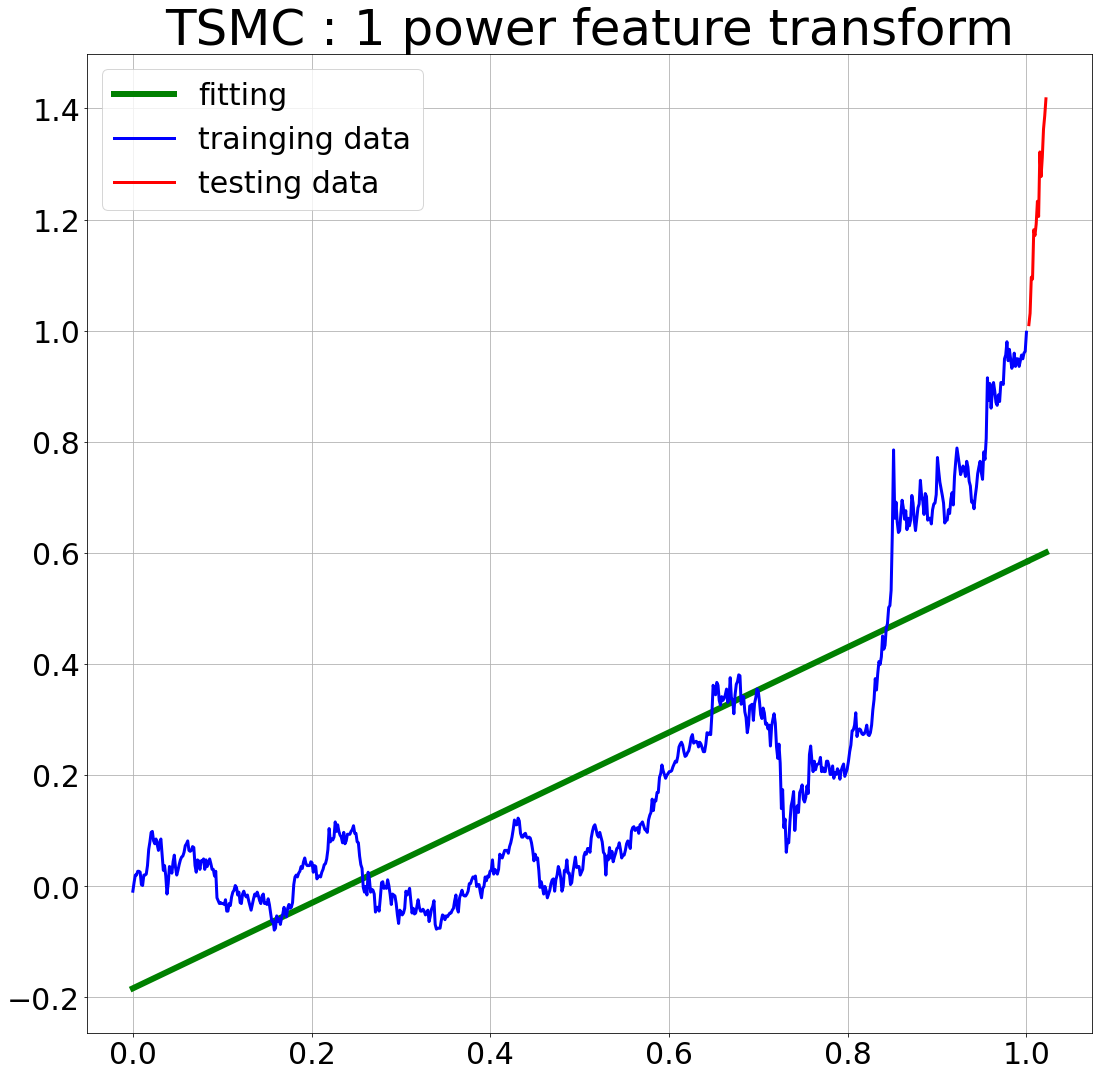

Trainging error =  0.06479817472752229
Testing error =  0.3158521366134771


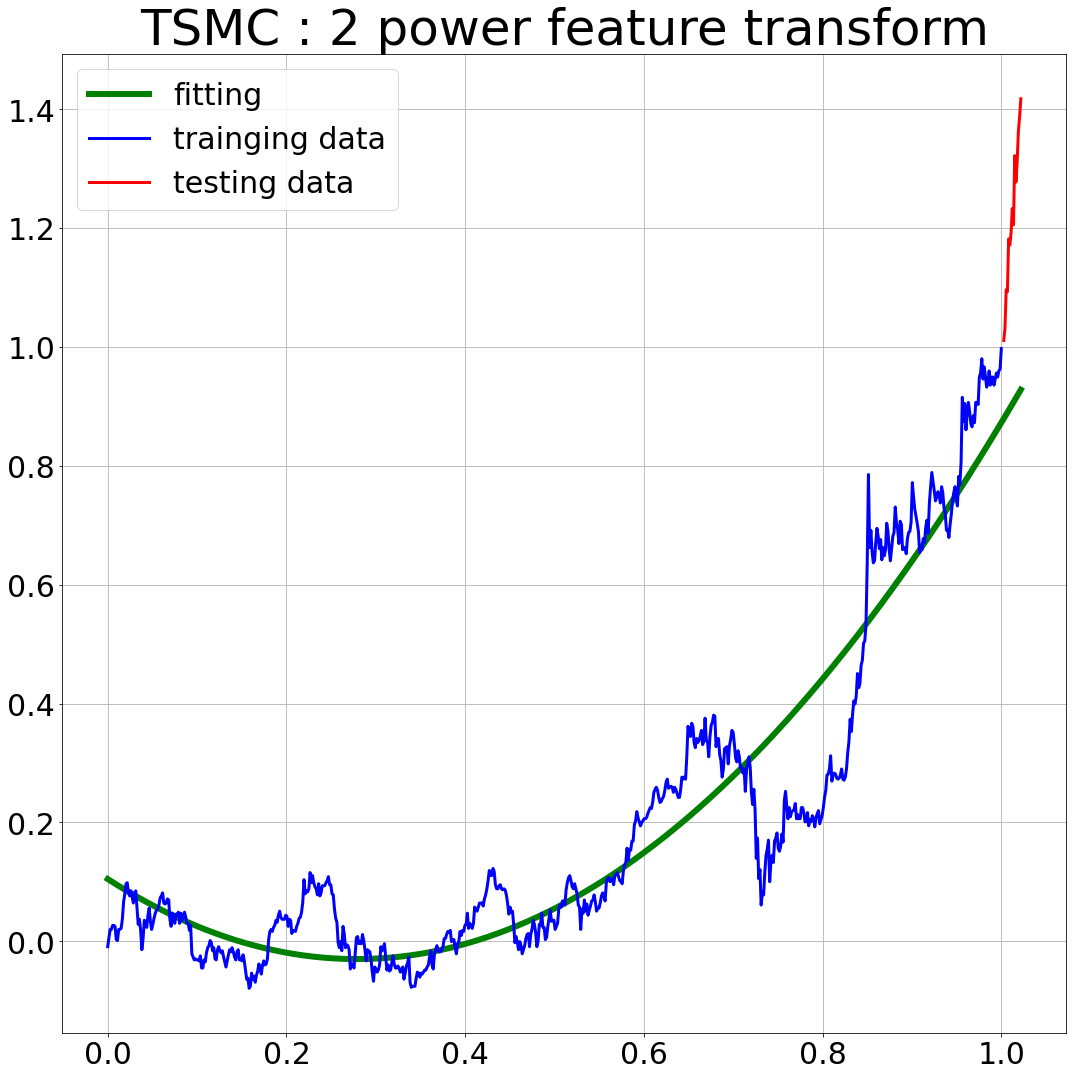

Trainging error =  0.06197185585219961
Testing error =  0.21250239812001384


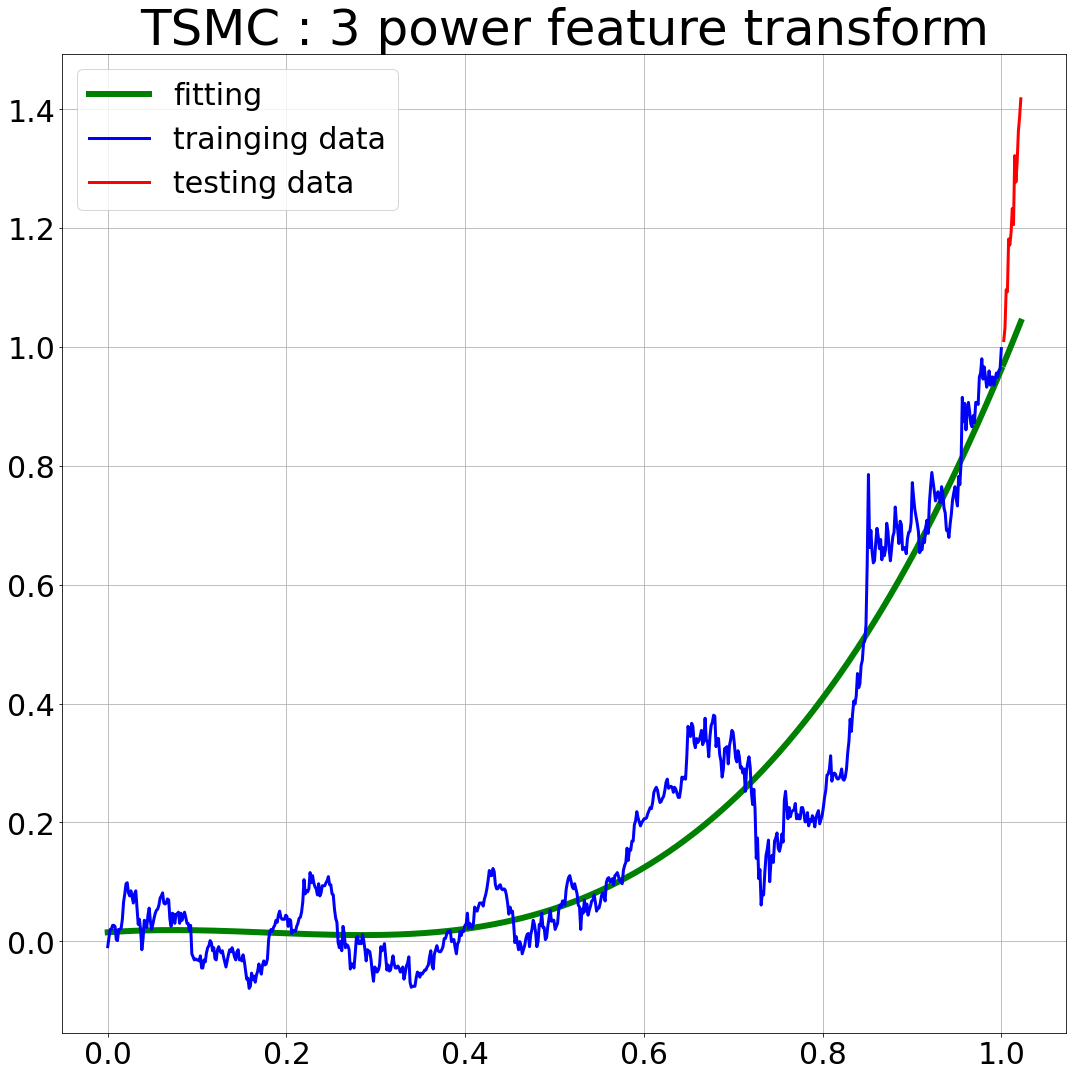

Trainging error =  0.06077941070557972
Testing error =  0.13661385816645435


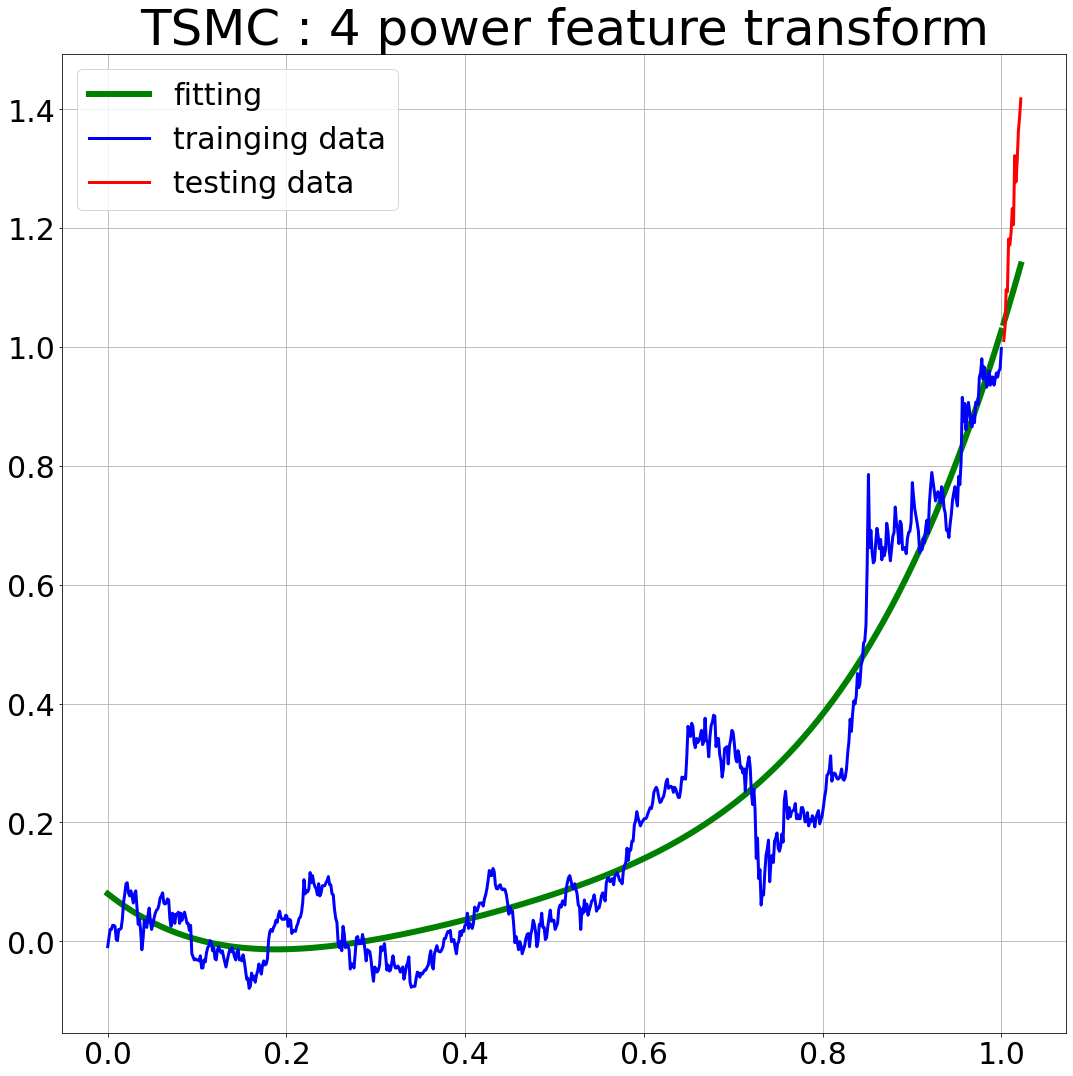

Trainging error =  0.059852545005731866
Testing error =  0.09511484638919468


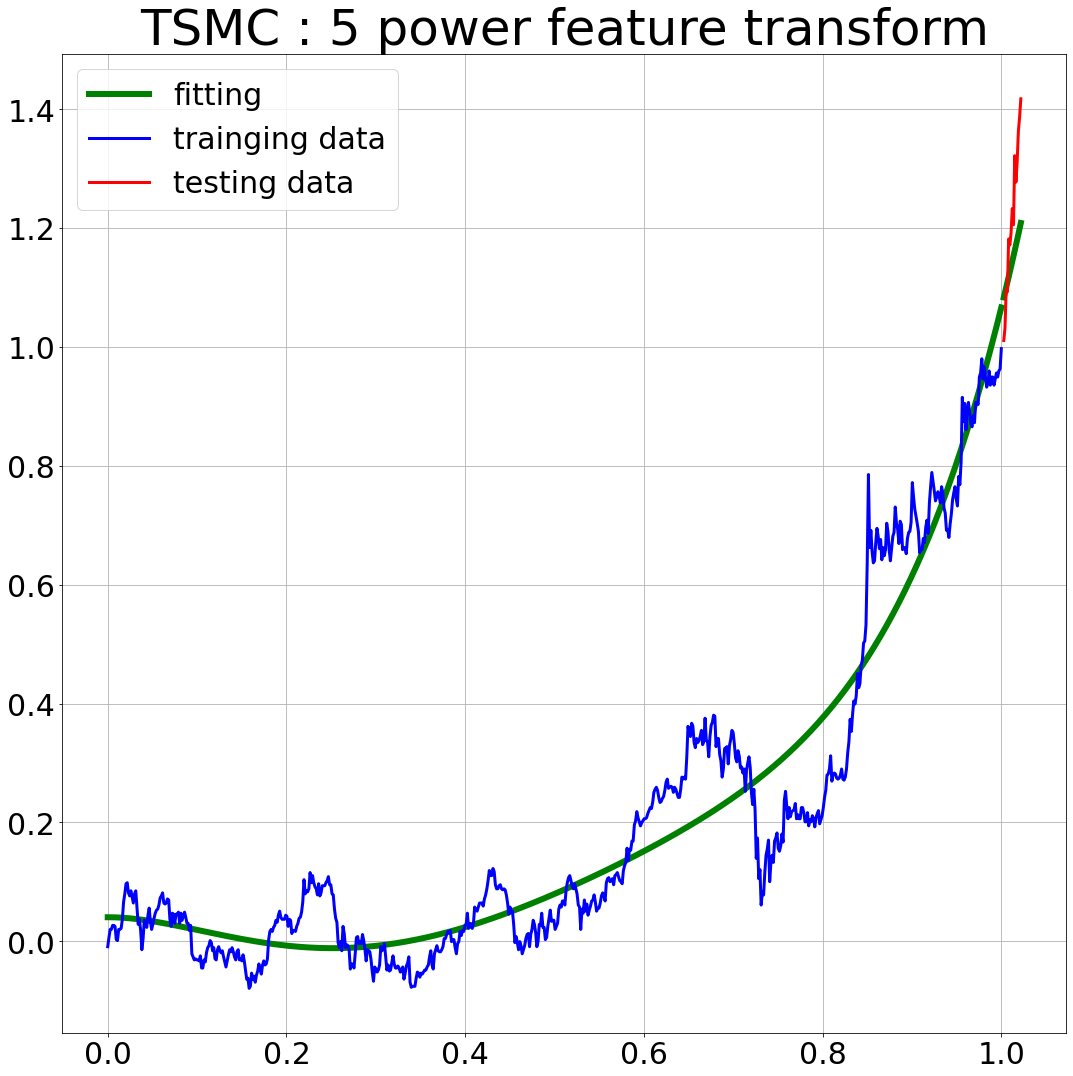

Trainging error =  0.059765938860547985
Testing error =  0.13762825039792811


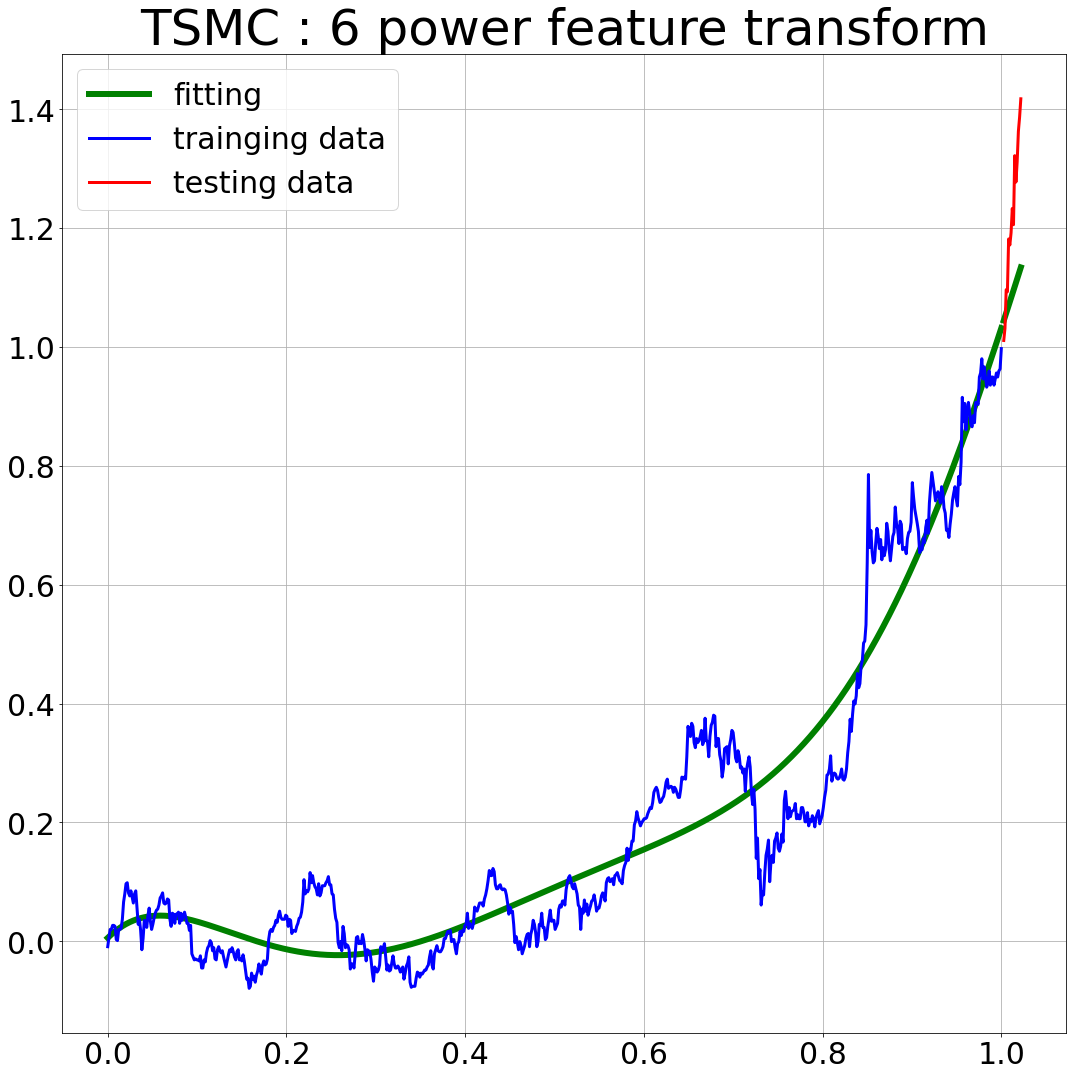

Trainging error =  0.056094691260408946
Testing error =  0.33731163001719505


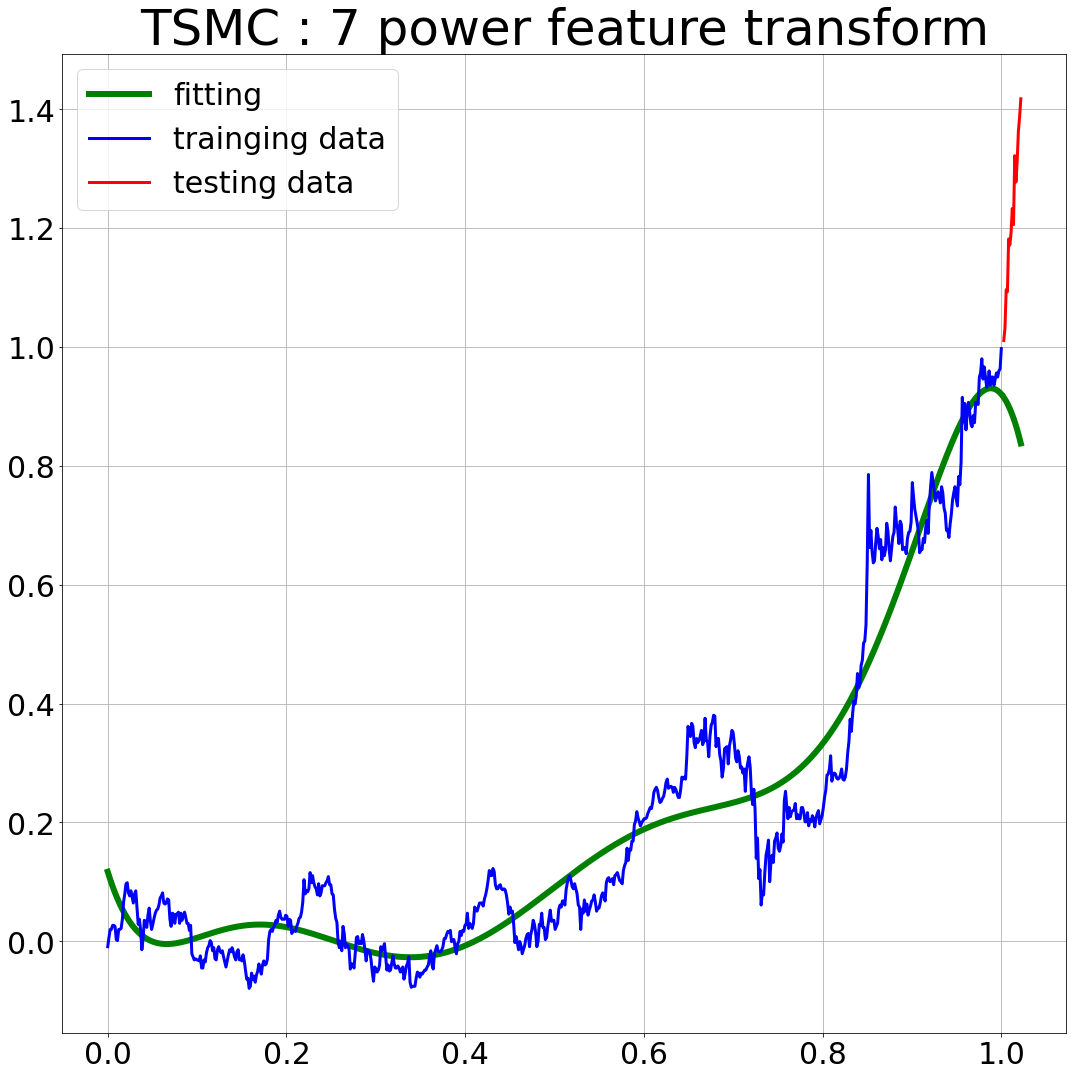

Trainging error =  0.05336597564748368
Testing error =  0.46750748130612646


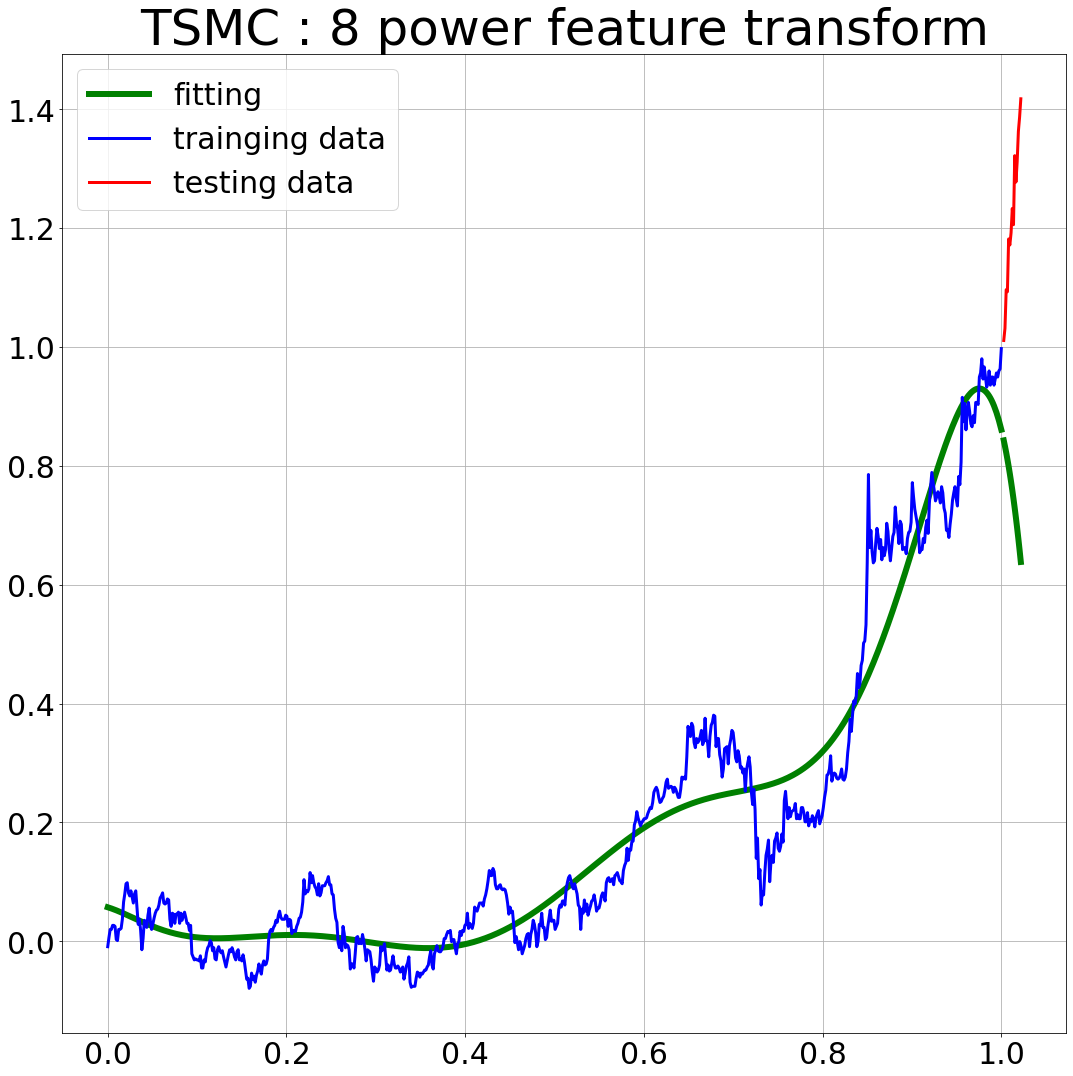

Trainging error =  0.04971796249634729
Testing error =  0.20638688340558506


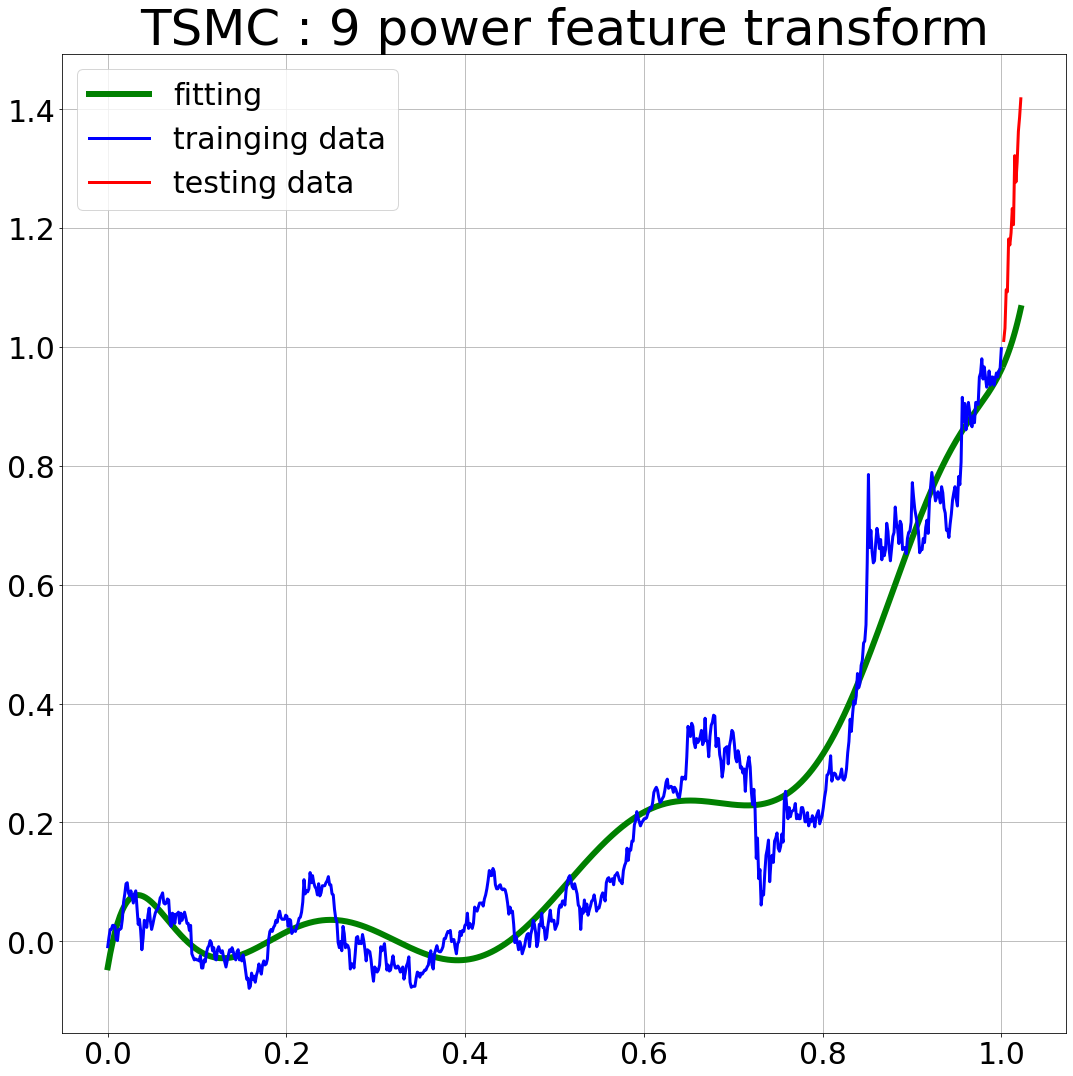

Trainging error =  0.04755059762396628
Testing error =  0.06181176869989904


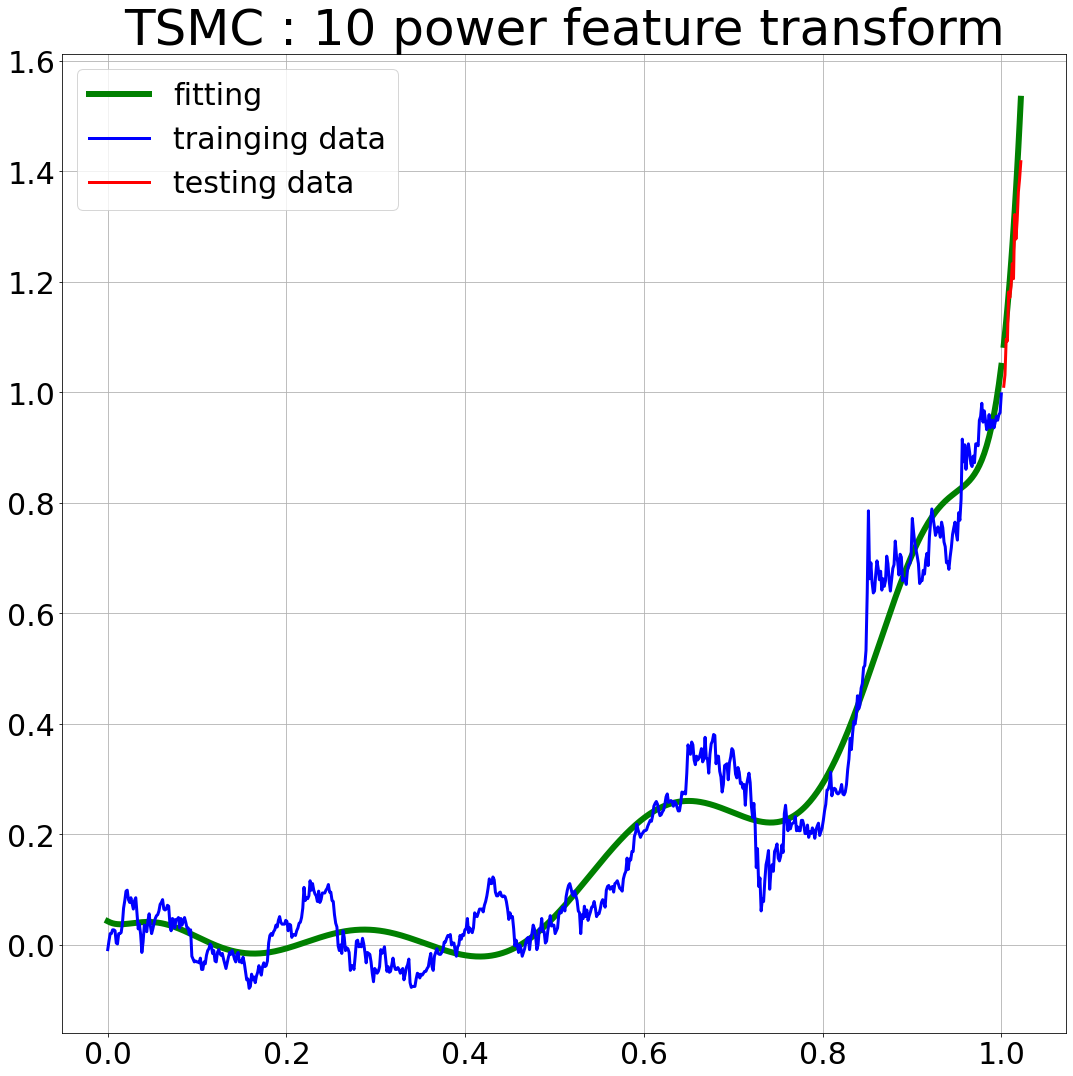

Trainging error =  0.043617446925433935
Testing error =  0.3600930353092217


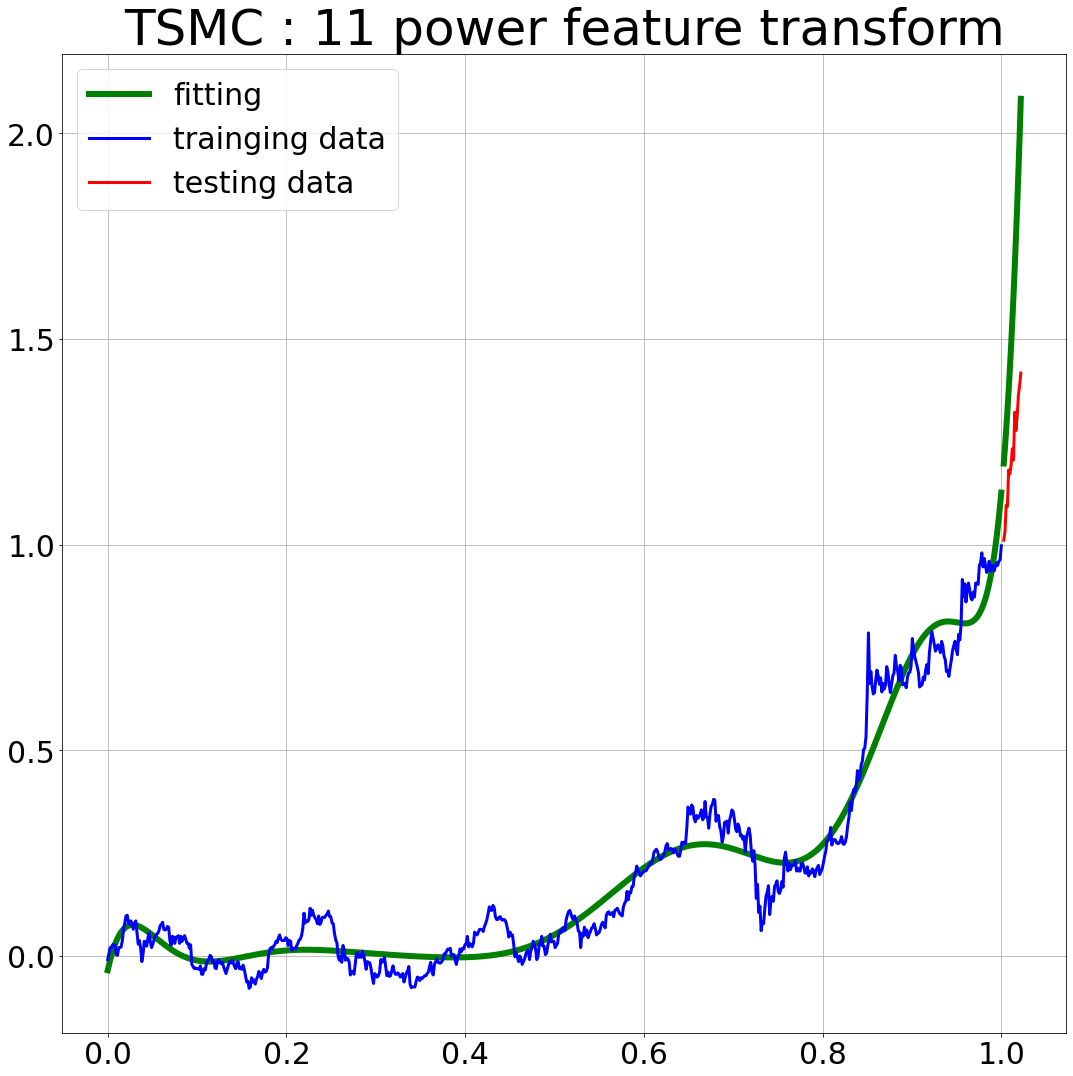

Trainging error =  0.04367386598547912
Testing error =  0.37961533026237676


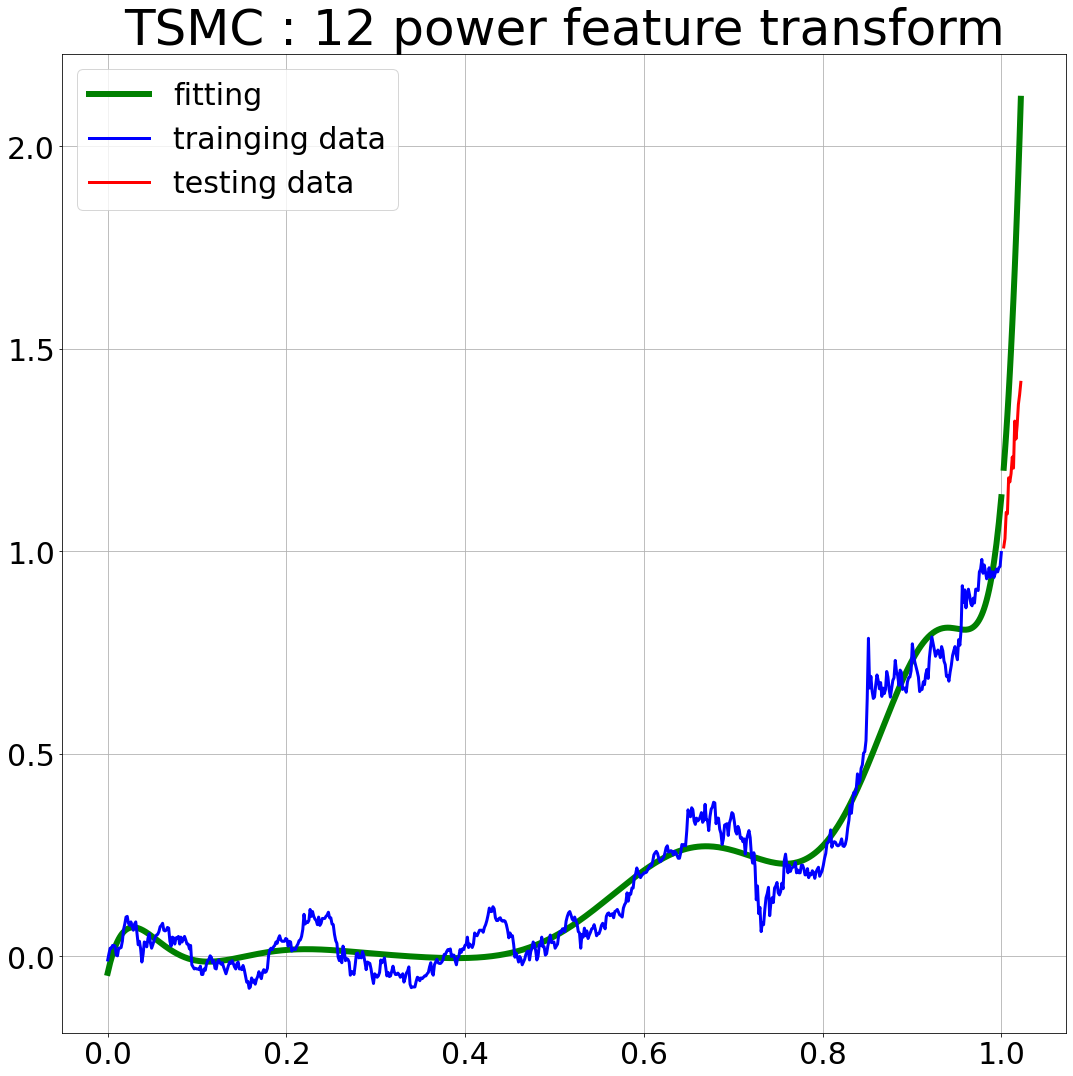

Trainging error =  0.2284147206407406
Testing error =  5.244381598630653


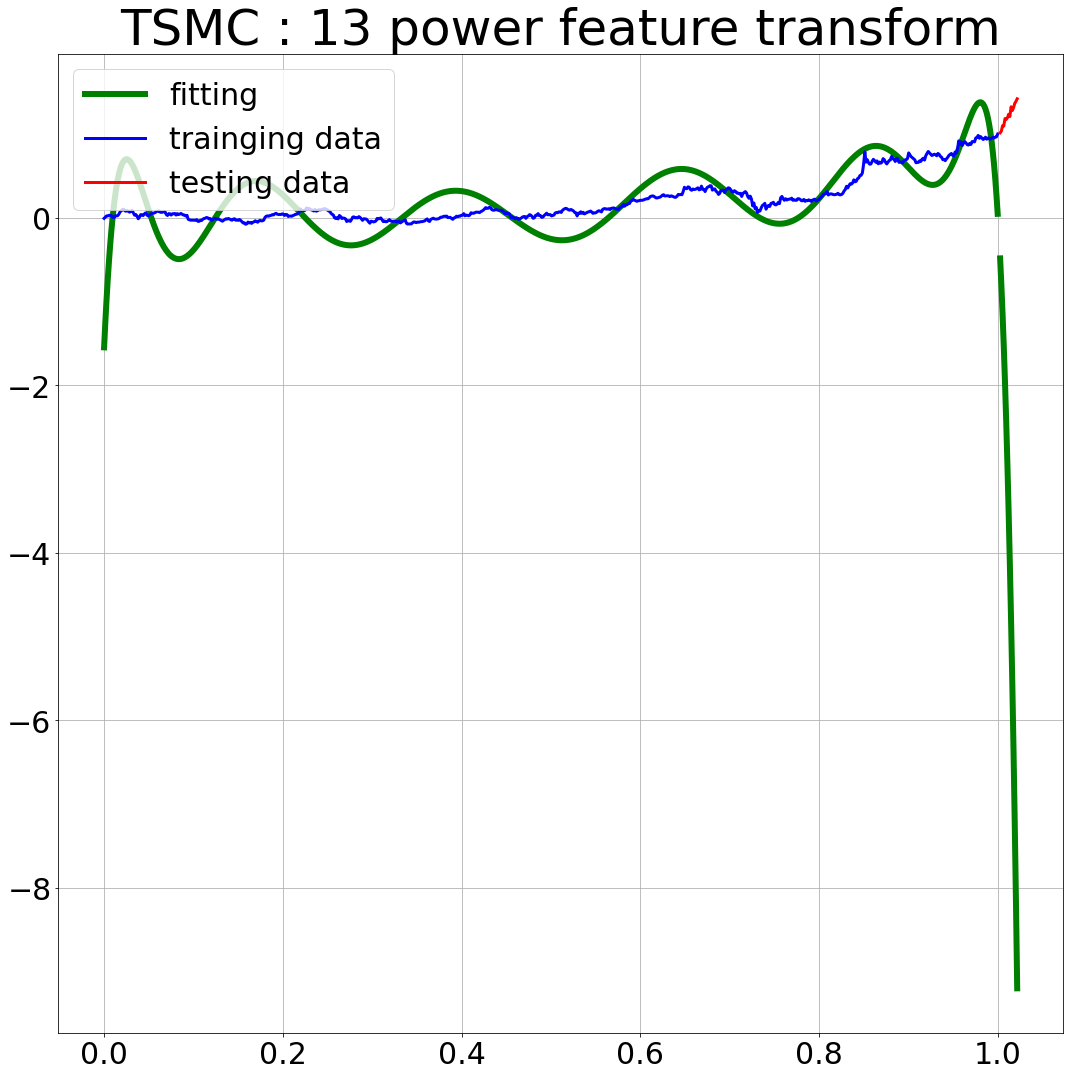

Trainging error =  0.03948044132117145
Testing error =  0.26321109666539183


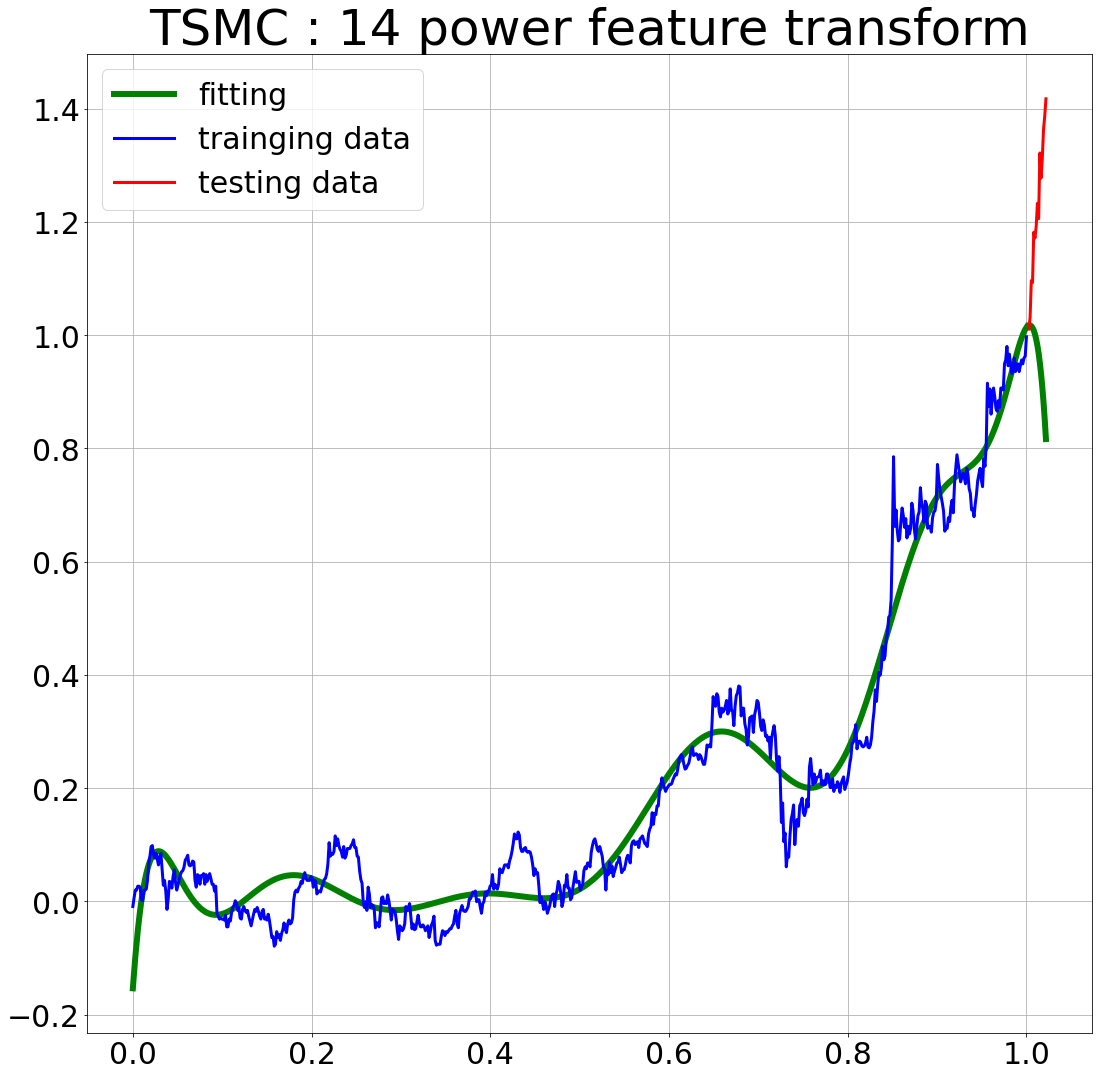

Trainging error =  0.04863446929418343
Testing error =  2.0686807002863348


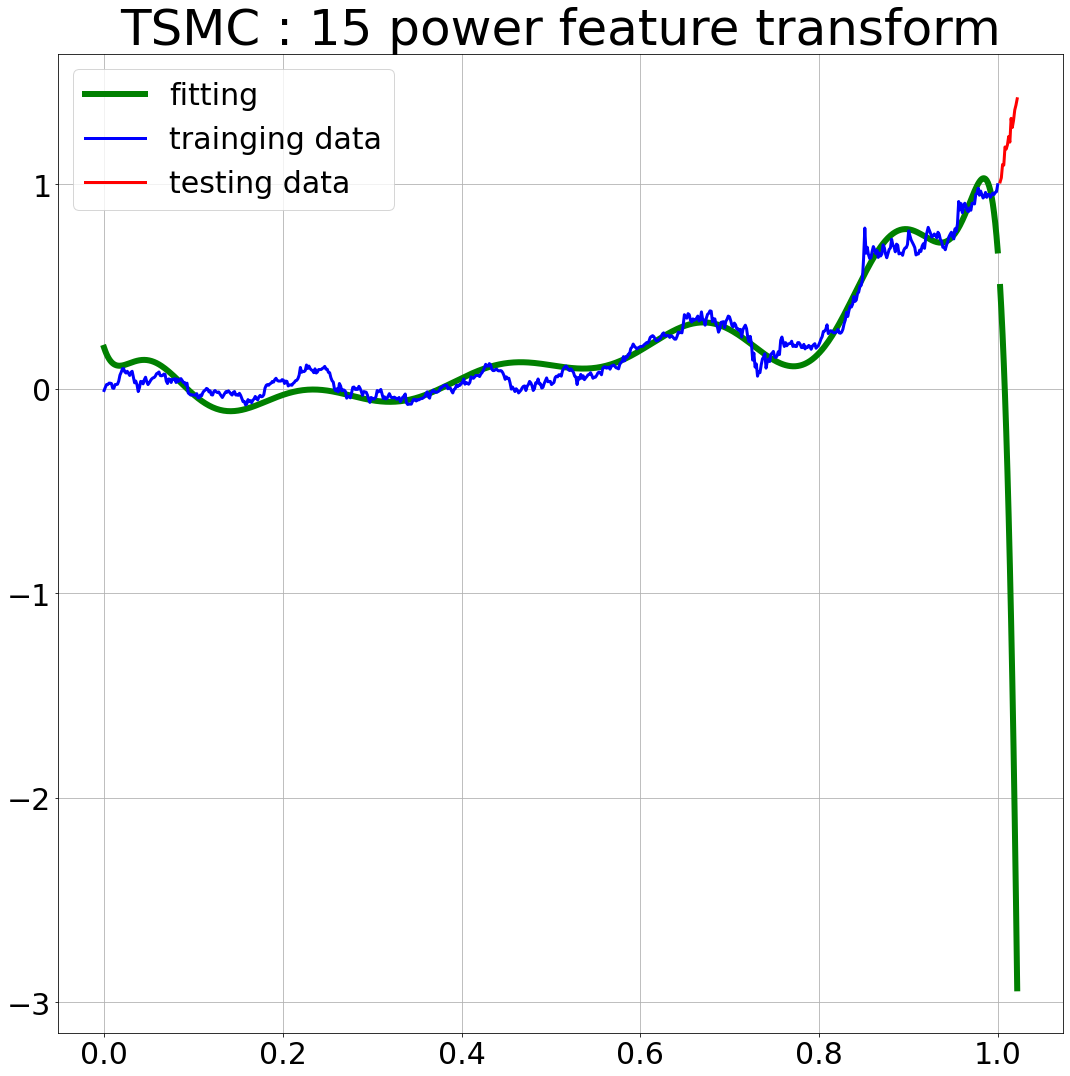

Trainging error =  0.03468379996285798
Testing error =  1.0954968226754227


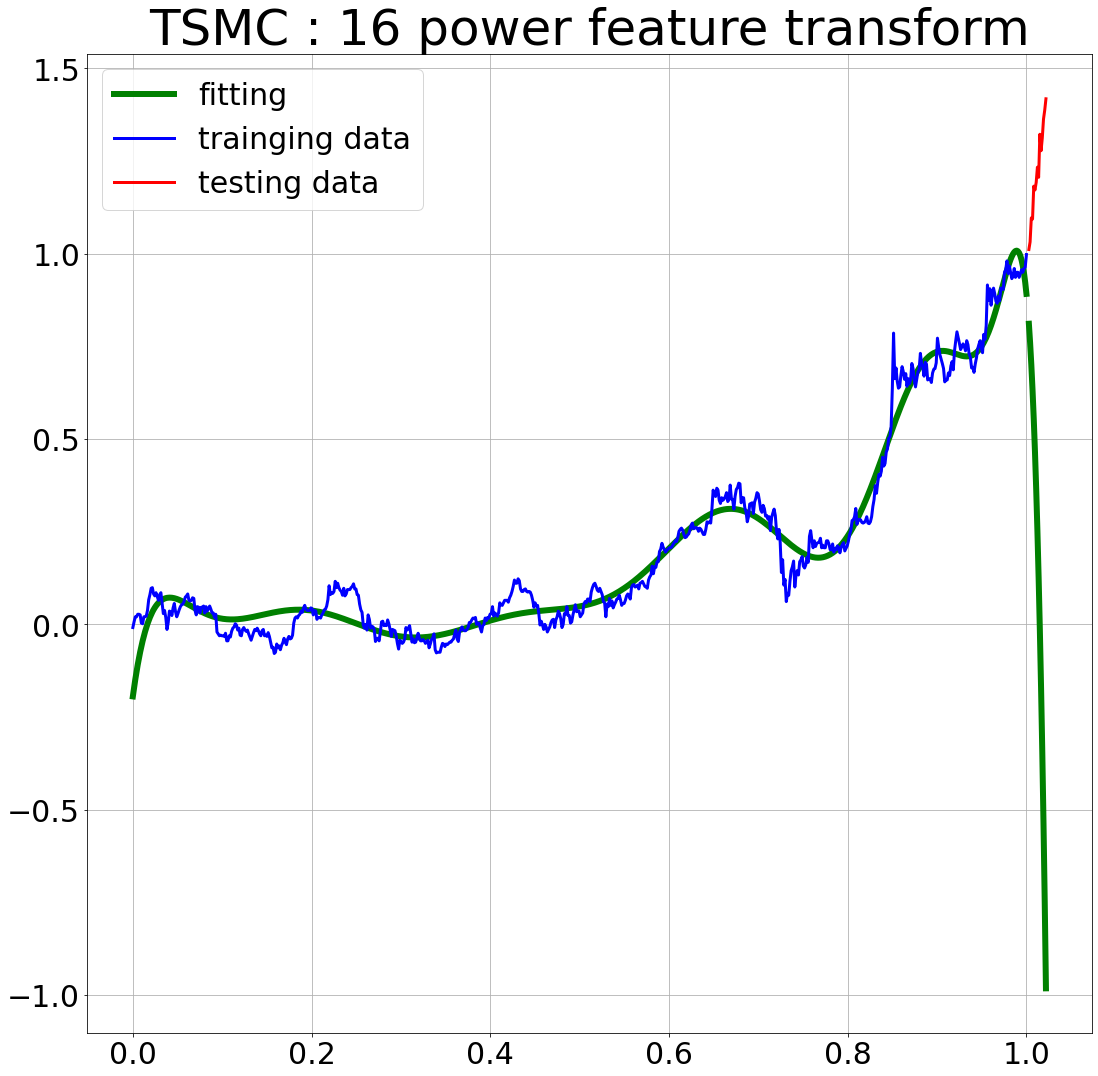

Trainging error =  0.03148693675556783
Testing error =  1.4617141786643424


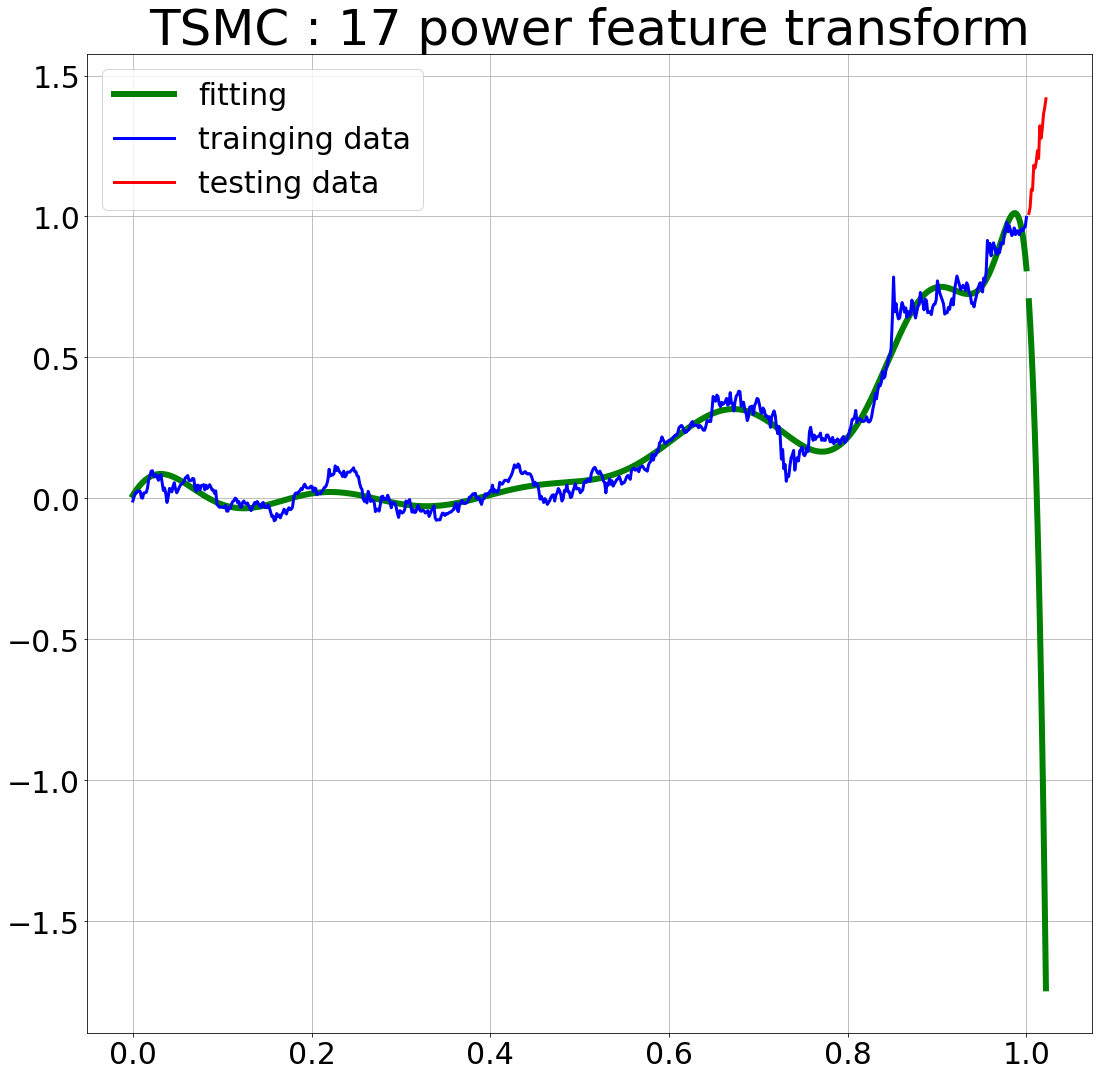

Trainging error =  0.09627705511645133
Testing error =  0.33212136498518496


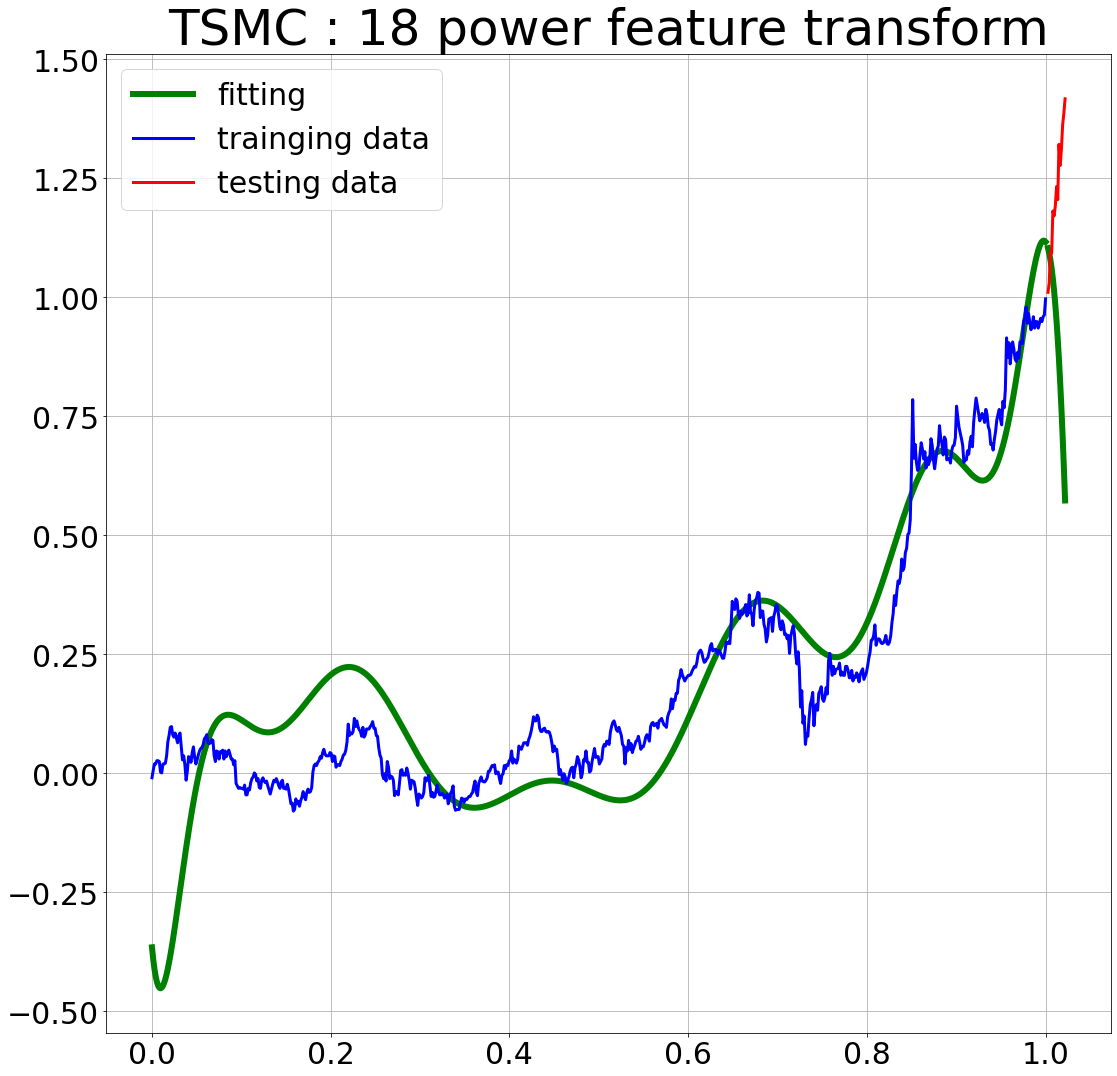

Trainging error =  0.05118993766502639
Testing error =  1.6552680029214482


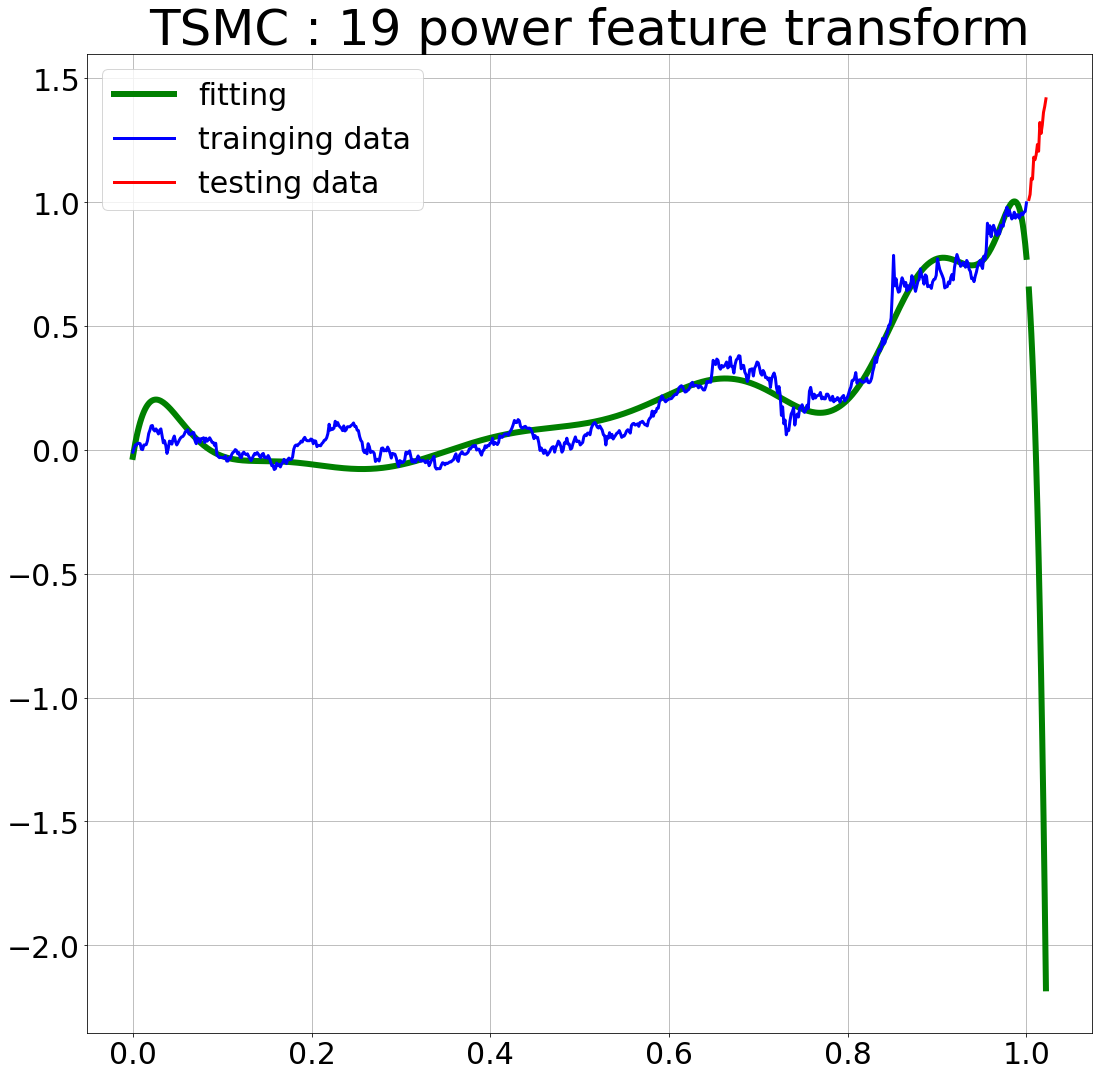

Trainging error =  0.03881927110480221
Testing error =  1.4492147823786794


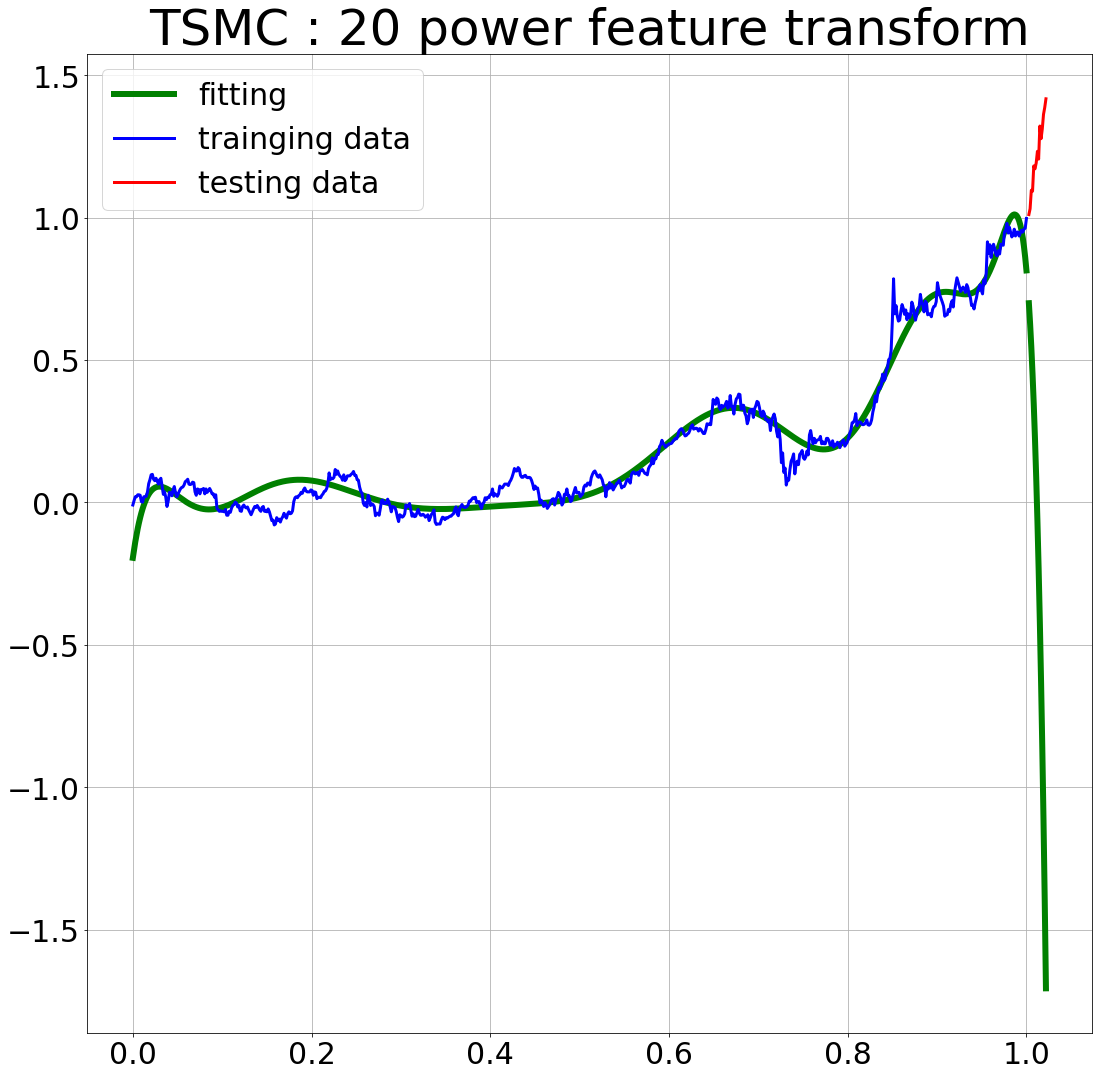

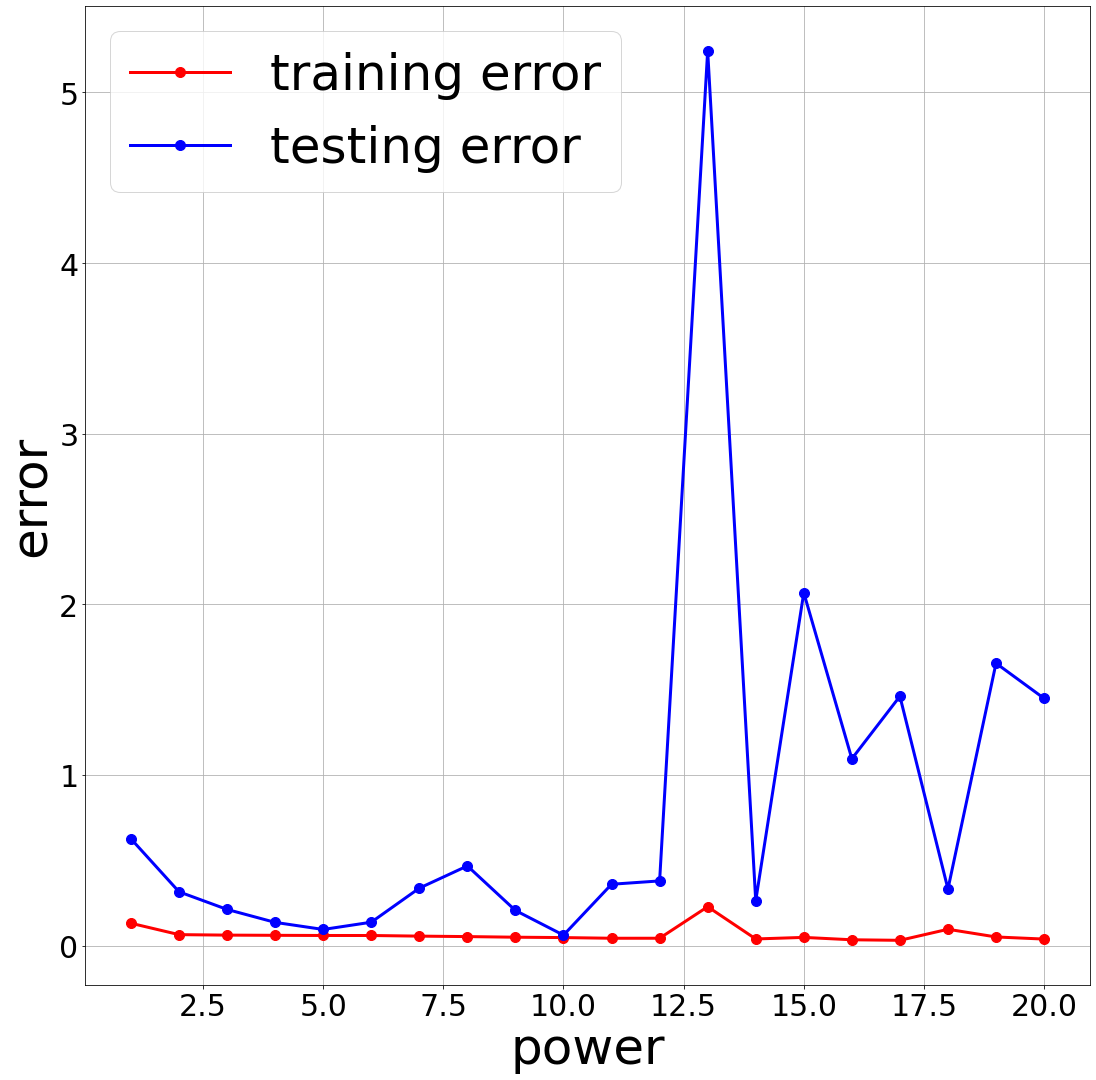

In [6]:
errorx=np.zeros(20)
errory_train=np.zeros(20)
errory_test=np.zeros(20)
for i in range(1,21):
    errorx[i-1]=i
    errory_train[i-1],errory_test[i-1]=Polynomial_regression(i,x,y,test_x,test_y)
plt.rcParams["figure.figsize"] = (18,18)
plt.plot(errorx,errory_train,"r-o",linewidth=3,markersize=10,label="training error")
plt.plot(errorx,errory_test,"b-o",linewidth=3,markersize=10,label="testing error")
plt.xlabel("power",fontsize=50)
plt.ylabel("error",fontsize=50)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend(loc="upper left",fontsize=50)
plt.grid()
plt.show()